<a href="https://colab.research.google.com/github/IntroComputationalPhysics-UNT/euler-and-solve-ivp-firebats2000/blob/main/rigid_pendulum_assignment_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Plotting solutions to the rigid pendulum problem

In this assignment, we explore the solution to the undriven rigid pendulum using: the Euler code we wrote in class, and the `scipy.integrate` package.

In this assignemnt, please use $\omega_0 = 1$ and $I=1$, and $0\le t \le 100$.

----

**Additional information:**

We will use two different initial conditions:
* $\theta = \pi$ and $\frac{d\theta}{dt} = 0$, and
* $\theta = 0$ and $\frac{d\theta}{dt} = 2$.

**Temporal evolution of $\theta$:** for plots of $\theta$ versus $t$, include the following plotting options:
* `plt.figure(figsize=(10,2))`
* `plt.xlim([0, 100]) # time`
* `plt.ylim([- 5 * np.pi - 0.5, 5 * np.pi + 0.5]) # theta`
* Add axes labels and a legend

**Phase portraits:** for plots of $d\theta/dt$ versus $\theta$, include the following plotting options:
* `plt.figure(figsize=(12,3))`
* `plt.xlim([- 5 * np.pi - 0.5, 5 * np.pi + 0.5]) # theta`
* `plt.ylim([-  np.pi - 0.5,  np.pi + 0.5]) # angular velocity`
* Add axes labels and a legend

**Constant energy curves:** for contour plots of the energy, include the following plotting options:
* `plt.figure(figsize=(11,3))`
* `plt.xlim([- 5 * np.pi - 0.5, 5 * np.pi + 0.5]) # theta`
* `plt.ylim([-  np.pi - 0.5,  np.pi + 0.5]) # angular velocity`
* Add axes labels and a legend


## **Problem 1:**

Apply the Euler code we wrote in class to the rigid pendulum defined by $\ddot{\theta} + \omega_0^2 sin(\theta)=0$.

1. **[Text cell]:** Create a text cell with organized pseudocode.
2. **[Code cell(s)]:** For `theta_0 = math.pi`, and `ang_vel_0 = 0`, plot the temporal evolution of $\theta$.
3. **[Code cell(s)]:** For `theta_0 = 0`, and `ang_vel_0 = 2`, plot the temporal evolution of $\theta$ **_and_** the phase portrait.
4. **[Text cell]:** You will need to compare the simple Euler and symplectic/semi-implicit Euler methods and adjust mesh density to find sensible results. Explain your choice.

Problem 1 text cell  for organized pseudocode

Constants:
*  $\omega_0$ = 1
*  I = 1
*  t $\epsilon$ [0, 100]
*  $\Delta$ (time step) small enough for staablility

Equations of motion:
*  $\theta' = v$
*  $v' = -\omega_0^2sin(\theta)$

Simple Euler (explicit):
*  $\theta_{n+1} = \theta_n + \Delta tv_n$
*  $v_{n+1} = v_n - \Delta t \omega_0^2 sin(\theta_0)$

Symplectic Euler (semi-implicit):
*  $v_{n+1} = v_n − \Delta t ω_0^2 sin(θ_n)$
*  $\theta_{n+1} = \theta_n + \Delta t v_{n+1}$

Procedure:
1. Choose initial conditions:
* Case A: $\theta(0) = \pi, v(0) = 0$
* Case B: $\theta(0) = 0, v(0) = 2$

2. Initialize arrays for $\theta$(t) and v(t).

3. Loop over time steps applying chosen scheme.

4. Plot:
* $\theta$ vs. t (temporal evolution)
* Phase portrait (v vs. $\theta$)
* Energy contours for comparison

5. Compare Euler vs Symplectic Euler:

* If Euler does not conserve energy, then spirals in/out.
* If symplectic Euler approximately conserves energy, then stable oscillations.
* Adjust $\Delta$t to balance stability vs. computation time.


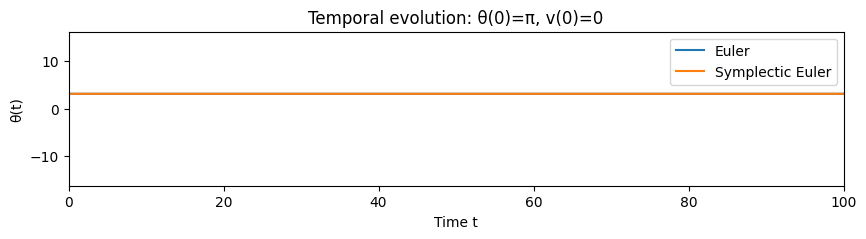

In [1]:
# problem 1 code cell for temporal evolution of theta plot

import numpy as np
import matplotlib.pyplot as plt
import math

# Constants
omega0 = 1
dt = 0.01
t_max = 100
t = np.arange(0, t_max+dt, dt)

# Initial conditions
theta0 = math.pi
v0 = 0.0

# Arrays for Simple Euler
theta_euler = np.zeros_like(t)
v_euler = np.zeros_like(t)
theta_euler[0], v_euler[0] = theta0, v0

# Arrays for Symplectic Euler
theta_symp = np.zeros_like(t)
v_symp = np.zeros_like(t)
theta_symp[0], v_symp[0] = theta0, v0

# Integration loop
for i in range(len(t)-1):
    # Simple Euler
    theta_euler[i+1] = theta_euler[i] + dt * v_euler[i]
    v_euler[i+1] = v_euler[i] - dt * omega0**2 * np.sin(theta_euler[i])

    # Symplectic Euler
    v_symp[i+1] = v_symp[i] - dt * omega0**2 * np.sin(theta_symp[i])
    theta_symp[i+1] = theta_symp[i] + dt * v_symp[i+1]

# Plot temporal evolution
plt.figure(figsize=(10,2))
plt.plot(t, theta_euler, label="Euler")
plt.plot(t, theta_symp, label="Symplectic Euler")
plt.xlim([0, 100])
plt.ylim([-5*np.pi-0.5, 5*np.pi+0.5])
plt.xlabel("Time t")
plt.ylabel("θ(t)")
plt.legend()
plt.title("Temporal evolution: θ(0)=π, v(0)=0")
plt.show()



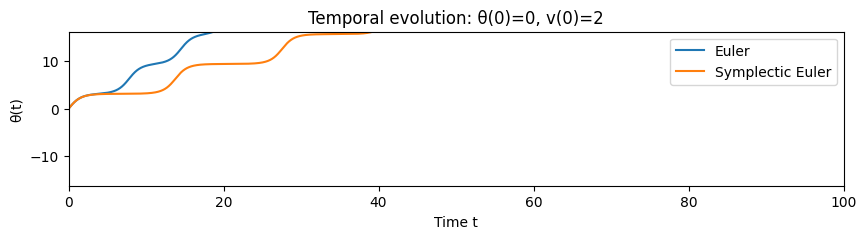

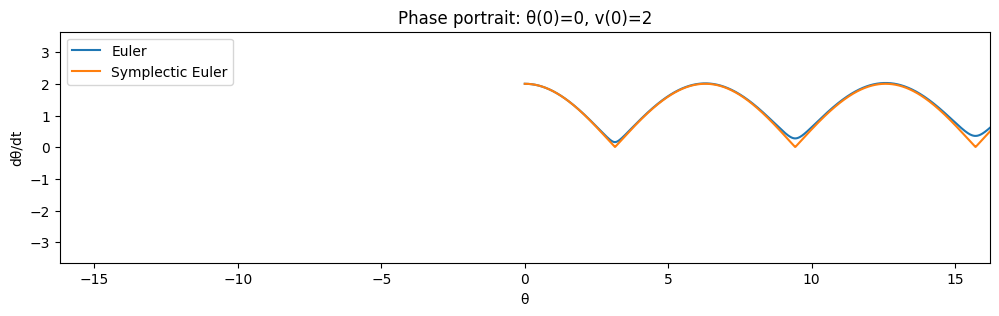

In [2]:
# problem 1 code cell for temporal evolution of  theta  and the phase portrait

# Initial conditions
theta0 = 0.0
v0 = 2.0

theta_euler = np.zeros_like(t)
v_euler = np.zeros_like(t)
theta_euler[0], v_euler[0] = theta0, v0

theta_symp = np.zeros_like(t)
v_symp = np.zeros_like(t)
theta_symp[0], v_symp[0] = theta0, v0

# Integration loop
for i in range(len(t)-1):
    # Simple Euler
    theta_euler[i+1] = theta_euler[i] + dt * v_euler[i]
    v_euler[i+1] = v_euler[i] - dt * omega0**2 * np.sin(theta_euler[i])

    # Symplectic Euler
    v_symp[i+1] = v_symp[i] - dt * omega0**2 * np.sin(theta_symp[i])
    theta_symp[i+1] = theta_symp[i] + dt * v_symp[i+1]

# Plot temporal evolution
plt.figure(figsize=(10,2))
plt.plot(t, theta_euler, label="Euler")
plt.plot(t, theta_symp, label="Symplectic Euler")
plt.xlim([0, 100])
plt.ylim([-5*np.pi-0.5, 5*np.pi+0.5])
plt.xlabel("Time t")
plt.ylabel("θ(t)")
plt.legend()
plt.title("Temporal evolution: θ(0)=0, v(0)=2")
plt.show()

# Phase portrait
plt.figure(figsize=(12,3))
plt.plot(theta_euler, v_euler, label="Euler")
plt.plot(theta_symp, v_symp, label="Symplectic Euler")
plt.xlim([-5*np.pi-0.5, 5*np.pi+0.5])
plt.ylim([-np.pi-0.5, np.pi+0.5])
plt.xlabel("θ")
plt.ylabel("dθ/dt")
plt.legend()
plt.title("Phase portrait: θ(0)=0, v(0)=2")
plt.show()


problem 1 text cell for comparison

* The explicit Euler method tends to drift: energy increases or decreases over time, giving spirals in phase space.

* The symplectic Euler method approximately conserves energy and produces bounded oscillations, closer to the true pendulum dynamics.

* A smaller time step Δt reduces numerical artifacts but increases computation.

* For nonlinear systems like the pendulum, the symplectic Euler scheme is generally preferred because it respects the Hamiltonian structure of the system.

## **Problem 2:**

Use `scipy.integrate` and `solve_ivp` to solve the same problem. You'll need to settle on a solver and on tolerances to get physically meaningful results.

1. **[Text cell]:** Include a text cell with organized pseudocode.
2. **[Code cell(s)]:** For `theta_0 = math.pi`, and `ang_vel_0 = 0`, plot the temporal evolution of $\theta$.
3. **[Code cell(s)]:** For `theta_0 = 0`, and `ang_vel_0 = 2`, plot the temporal evolution of $\theta$ **_and_** the phase portrait.
4. **[Text cell]:** You will need to choose a solver and tolerances to see sensible results. Use `help(solve_ivp)` or `solve_ivp?` to explore these options. Explain your choice.



Problem 2 text cell for organized pseudocode

Constants:
*  $\omega_0$ = 1
*  I = 1
*  t $\epsilon$ [0, 100]

Equations of motion:
*  $\theta' = v$
*  $v' = -\omega_0^2sin(\theta)$

Procedure:
1. Import solve_ivp from scipy.integrate.
2. Define the RHS (Right Hand SIde) of the ODE (Ordinary Differential Equation) system as a Python function returning [$\theta'$, $v$'].
3. For case A:
* Initial comditions: $\theta(0) = \pi, v(0) = 0$.
* Use solve_ivp over [0, 100] with chosen solver and tolerances.
* Plot $\theta(t)$
4. For case B:
* Initial conditions: $\theta(0) = 0, v(0) = 2$.
* Use solve_ivp again.
* Plot $\theta(t)$ and pase portrait v vs $\theta$.
5. Experiment with solvers:
* Use "RK45" as the main solver, "RK23" for quick approximations, "Radau" and "BDF" if introduced stiffness (highly damped pendulum with big timescales)
* Compare performance on nonlinear pendulum dynamics.
6. Choose solver and tolerances:
* Ensure numerical solution respects physical features (bounded oscillations or rotations).
* Adjust rtol (relative tolerance) and atol (absolute tolerance) until trasjectories are smooth and energy error remains small.

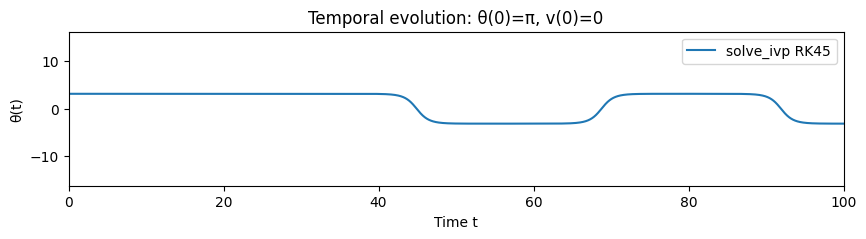

In [3]:
# problem 2 code cell for temporal evolution of theta plot

import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import solve_ivp

# Constants
omega0 = 1

# ODE system
def pendulum(t, y):
    theta, v = y
    dtheta_dt = v
    dv_dt = -omega0**2 * np.sin(theta)
    return [dtheta_dt, dv_dt]

# Time span and evaluation points
t_span = (0, 100)
t_eval = np.linspace(0, 100, 5000)  # dense sampling for smooth plot

# Initial conditions
y0 = [math.pi, 0.0]

# Solve using RK45 (adaptive Runge-Kutta) with tolerances
sol = solve_ivp(
    pendulum, t_span, y0, method="RK45", t_eval=t_eval,
    rtol=1e-9, atol=1e-9
)

# Plot temporal evolution
plt.figure(figsize=(10,2))
plt.plot(sol.t, sol.y[0], label="solve_ivp RK45")
plt.xlim([0, 100])
plt.ylim([-5*np.pi-0.5, 5*np.pi+0.5])
plt.xlabel("Time t")
plt.ylabel("θ(t)")
plt.legend()
plt.title("Temporal evolution: θ(0)=π, v(0)=0")
plt.show()


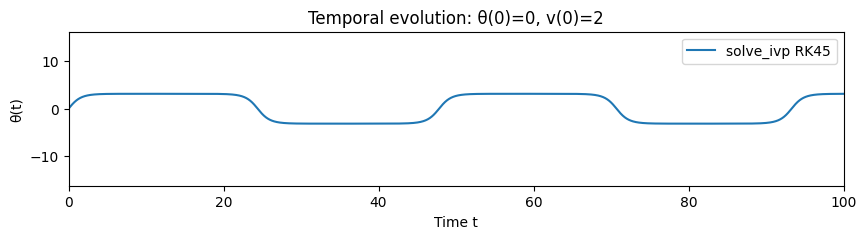

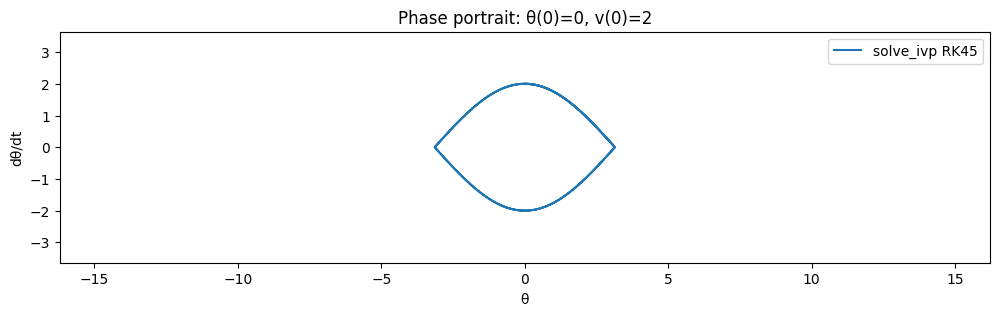

In [4]:
# problem 2 code cell for temporal evolution and phase portrait plot

# Initial conditions
y0 = [0.0, 2.0]

# Solve
sol = solve_ivp(
    pendulum, t_span, y0, method="RK45", t_eval=t_eval,
    rtol=1e-9, atol=1e-9
)

# Plot temporal evolution
plt.figure(figsize=(10,2))
plt.plot(sol.t, sol.y[0], label="solve_ivp RK45")
plt.xlim([0, 100])
plt.ylim([-5*np.pi-0.5, 5*np.pi+0.5])
plt.xlabel("Time t")
plt.ylabel("θ(t)")
plt.legend()
plt.title("Temporal evolution: θ(0)=0, v(0)=2")
plt.show()

# Phase portrait
plt.figure(figsize=(12,3))
plt.plot(sol.y[0], sol.y[1], label="solve_ivp RK45")
plt.xlim([-5*np.pi-0.5, 5*np.pi+0.5])
plt.ylim([-np.pi-0.5, np.pi+0.5])
plt.xlabel("θ")
plt.ylabel("dθ/dt")
plt.legend()
plt.title("Phase portrait: θ(0)=0, v(0)=2")
plt.show()


Text cell for solver choice and tolerances

Solver options:
* "RK45" (default): 5th-order explicit Runge–Kutta with adaptive step size. Excellent for smooth ODEs like the pendulum.
* "RK23": Lower-order Runge–Kutta; less efficient here.
* "Radau": Implicit Runge–Kutta, suited for stiff systems (pendulum is not stiff).
* "BDF": Multistep implicit solver, also for stiff problems.
* "LSODA": Automatically switches between stiff/non-stiff methods.

For this nonlinear pendulum problem, "RK45" is the best choice.

Tolerance settings (rtol, atol):
* Default tolerances (1e-3) are too loose, slow drifts in energy may appear, unphysical phase portraits near the separatrix.
* Tight tolerances (e.g. rtol=1e-9, atol=1e-9) reduce numerical error so the trajectory stays on the correct separatrix or near a constant-energy contour.
* The tradeoff: smaller tolerances mean more steps, longer computation.

Dense output (t_eval):
*The solver adapts step sizes internally. To make smooth plots, request evaluation on a dense uniform grid with t_eval=np.linspace(...).
*This does not affect integration accuracy, just plotting.

## **Problem 3:**

Debug and edit the code cell included below to plot the phase portrait on constant energy curves.

1. **[Code cell(s)]:** Debug the code cell below. Incorporate the details from the **_Constant energy curves_** item in the introduction. Add a comment at the end of each line explaining what that line does.
2. **[Code cell(s)]:** Combine the energy contours with your `theta_0 = 0`; `ang_vel_0=2` solution.
3. **[Text cell]:** Comment on the result.


In [ ]:
import numpy as np
import matplotlib.piplot as plt

def rigid_pendulum_energy(theta, ang_vel, omega_0=1, moment_of_inertia=1)
  energy = 0.5 * moment_of_inertia * ang_vel ** 2 + moment_of_inerti * omega_0 ** 2 * (1-np.cos(theta))
return energy

theta_list = np.linspace(-5 * np.pi, 5 * np.pi, 300)
ang_vel_list = np.linspace(- np.pi,  np.pi, 100)
theta_mesh, ang_vel_mesh = np.meshgrid(theta_list, ang_vel_list)
energy_mesh = rigid_pendulum_energy(theta_mesh, ang_vel_mesh)
low_levels = np.linespace(0, 2, 5, endpoint=False)
high_levels = np.linspace(2, energy_mesh.max(), 15)
levels = np.concatenate((low_levels, high_levels))

x_lim = [-5 * np.pi - 0.5, 5 * np.pi + 0.5]
y_lim = [- np.pi - 0.5, np.pi + 0.5]
x_ticks = np.pi * [-4, -2, 0, 2, 4]
x_tick_labels = ['$-4\\pi$', '$-2\\pi$', '$0$', '$2\\pi$', '$4\\pi$']
plt.figure(figsize={12, 3})
contours = plt.contourf(theta_mesh, ang_vel_mesh, energy_mesh, levels=30, cmap='viridis')
plt.contour(theta_mesh, ang_vel_mesh, energy_mesh, levels=levels, colors='white', linewidths=0.5)
# plt.plot(theta_plot[0], ang_vel_plot[1], label='rigid pendulum', color='red', linewidth=0.5)
plt.colorbar(contours., label='energy')
plt.xlabel('$\\theta$')
plt.ylabel('$d\\theta/dt$')
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(range(-3,4,1))
plt.xlim(x_lim)
plt.ylim(y_lim)
plt.show()